# **Task - 1**
# **Perform Data Cleaning**
### We use tatanic dataset for this task. Tatanic dataset has 2 tables train and test .
### Clean a dataset by removing missing values and outliers.

# **Test Table**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io


In [2]:
# read the table-1 i.e. test.csv
df = pd.read_csv('/content/test.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# check null values
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
# replace null values
df['Age'].fillna(df['Age'].median(), inplace =  True)
df.dropna(subset=['Fare'], inplace = True)
df.drop(columns = ['Cabin'], inplace = True)

In [5]:
# again check null Value
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
# remove all duplicates--
df.drop_duplicates(inplace = True)

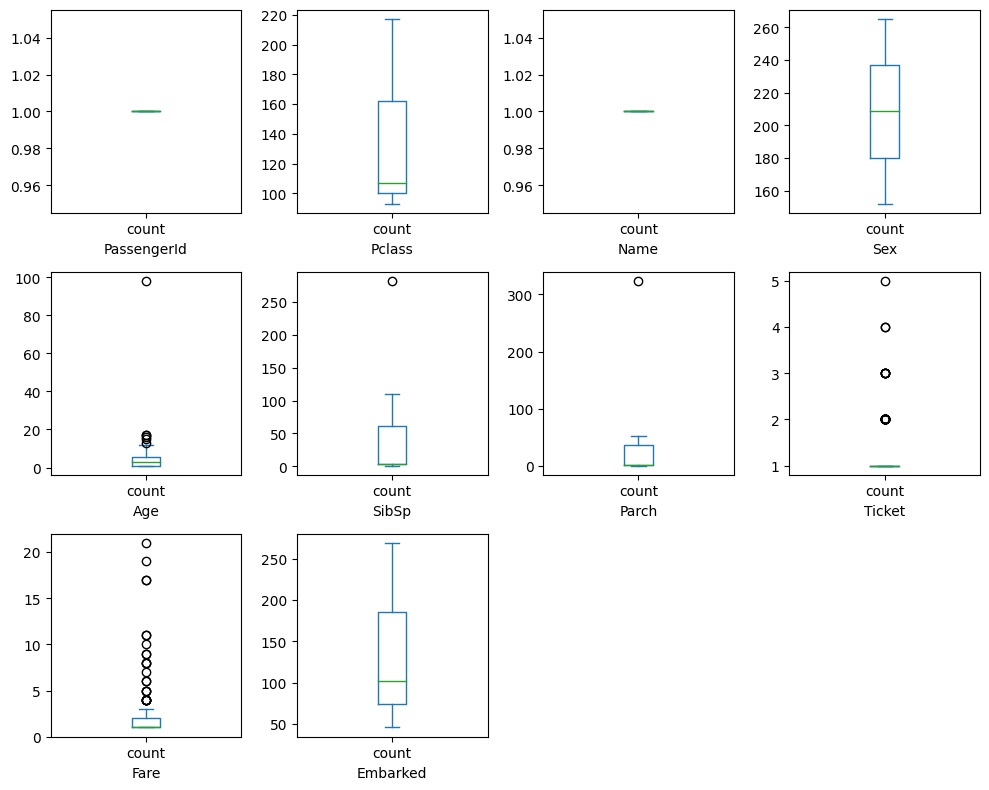

In [7]:
# check outliers using boxplot


# Adjust figure size
plt.figure(figsize=(10, 8))

# Plotting each column's boxplot
plt.subplot(3, 4, 1)
df['PassengerId'].value_counts().plot(kind='box')
plt.xlabel('PassengerId')

plt.subplot(3, 4, 2)
df['Pclass'].value_counts().plot(kind ='box')
plt.xlabel('Pclass')

plt.subplot(3, 4, 3)
df['Name'].value_counts().plot(kind='box')
plt.xlabel('Name')

plt.subplot(3, 4, 4)
df['Sex'].value_counts().plot(kind ='box')
plt.xlabel('Sex')

plt.subplot(3, 4, 5)
df['Age'].value_counts().plot(kind='box')
plt.xlabel('Age')

plt.subplot(3, 4, 6)
df['SibSp'].value_counts().plot(kind='box')
plt.xlabel('SibSp')

plt.subplot(3, 4, 7)
df['Parch'].value_counts().plot(kind='box')
plt.xlabel('Parch')

plt.subplot(3, 4, 8)
df['Ticket'].value_counts().plot(kind='box')
plt.xlabel('Ticket')

plt.subplot(3, 4, 9)
df['Fare'].value_counts().plot(kind ='box')
plt.xlabel('Fare')

plt.subplot(3, 4, 10)
df['Embarked'].value_counts().plot(kind='box')
plt.xlabel('Embarked')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()

In [8]:
# removing outliers using IQR method

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


# **Train Table**

In [9]:
# read table-2 i.e. train.csv
df1 = pd.read_csv('/content/train.csv')
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
# check Null values
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Remove and fill the null value as per my requirement
df1['Age'].fillna(df1['Age'].median(), inplace = True)
df1.dropna(subset =['Embarked'], inplace = True)
df1.drop(columns=['Cabin'], inplace =True)

In [12]:
# again check  null values
df1.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

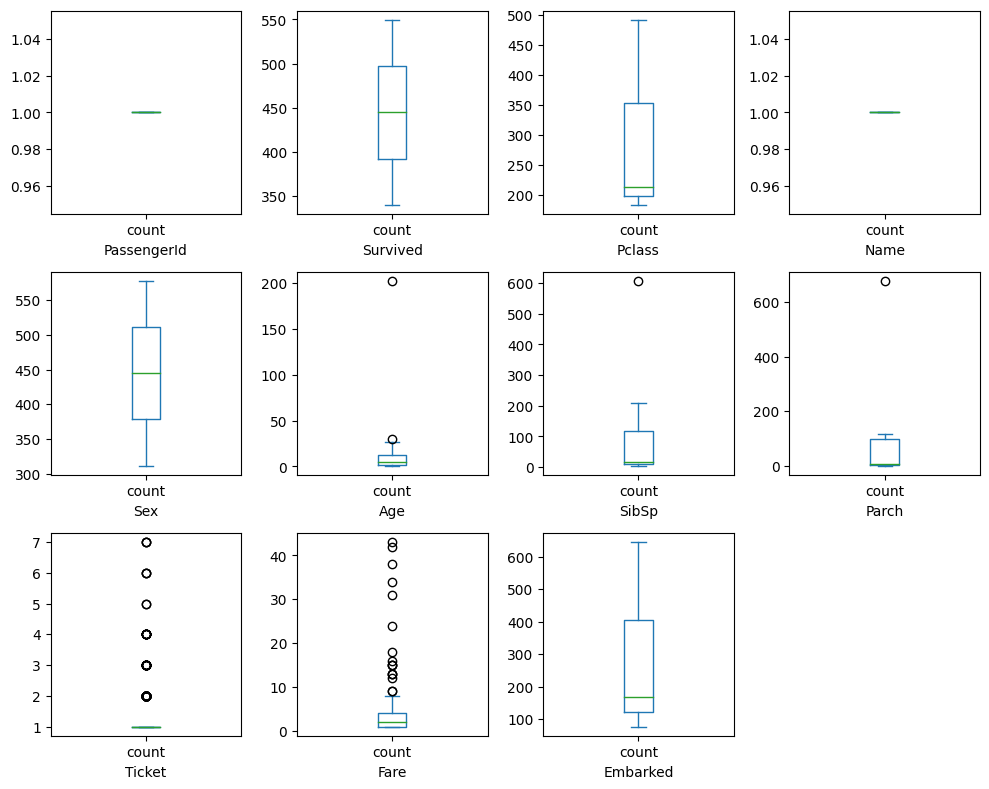

In [13]:
# find outliers using boxplot


# Adjust figure size
plt.figure(figsize=(10, 8))

# Plotting each column's boxplot
plt.subplot(3, 4, 1)
df1['PassengerId'].value_counts().plot(kind='box')
plt.xlabel('PassengerId')

plt.subplot(3,4,2)
df1['Survived'].value_counts().plot(kind = 'box')
plt.xlabel('Survived')

plt.subplot(3,4,3)
df1['Pclass'].value_counts().plot(kind = 'box')
plt.xlabel('Pclass')

plt.subplot(3,4,4)
df1['Name'].value_counts().plot(kind ='box')
plt.xlabel('Name')

plt.subplot(3,4,5)
df1['Sex'].value_counts().plot(kind = 'box')
plt.xlabel('Sex')

plt.subplot(3,4,6)
df1['Age'].value_counts().plot(kind ='box')
plt.xlabel('Age')

plt.subplot(3,4,7)
df1['SibSp'].value_counts().plot(kind='box')
plt.xlabel('SibSp')

plt.subplot(3,4,8)
df1['Parch'].value_counts().plot(kind ='box')
plt.xlabel('Parch')

plt.subplot(3,4,9)
df1['Ticket'].value_counts().plot(kind ='box')
plt.xlabel('Ticket')

plt.subplot(3,4,10)
df1['Fare'].value_counts().plot(kind= 'box')
plt.xlabel('Fare')

plt.subplot(3,4,11)
df1['Embarked'].value_counts().plot(kind = 'box')
plt.xlabel('Embarked')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()

In [14]:
# removing outliers using IQR method
Q11 = df1['Fare'].quantile(0.25)
Q31 = df1['Fare'].quantile(0.75)
IQR1 = Q31-Q11
lower_bound1 = Q11-1.5*IQR1
upper_bound1 = Q31+1.5*IQR1
df1[(df1['Fare'] >= lower_bound1) & (df1['Fare'] <= upper_bound1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# **Task-1 End**